## Overview

The Python code to pull the house data from Redfin will be separately uploaded to the GitHub. The output JSON file from that code is loaded here as the Redfin house data.
Foursquare API and data preparation is very similar to what we learned from the course.

Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.0.2p             |       h470a237_1         3.1 MB  conda-forge
    certifi-2018.10.15         |        py36_1000         138 KB  conda-forge
    geopy-1.17.0               |             py_0          49 KB  conda-forge
    ca-certificates-2018.10.15 |       ha4d7672_0         135 KB  conda-forge
    conda-4.5.11               |        py36_1000         651 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.1 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0            conda-forge
    geopy:           

<a id='item1'></a>

## 1. Download and Explore Dataset

#### Load and explore the Redfin data, Redfin data is pulled from the Redfin website, separate Python code is attached for information

In [3]:
with open('redfin_output.json') as json_data:
    redfin_data = json.load(json_data)

#### Tranform the data into a *pandas* dataframe

In [4]:
# define the dataframe columns
column_names = ['house', 'price', 'beds', 'baths', 'sqFt', 'price_per_sqFt', 'latitude', 'longitude', 'elmt_school_name', 'elmt_school_rating', 'elmt_school_distance', 
                'mid_school_name', 'mid_school_rating', 'mid_school_distance', 'high_school_name', 'high_school_rating', 'high_school_distance'] 

# instantiate the dataframe
houses_redfin = pd.DataFrame(columns=column_names)

Take a look at the empty dataframe to confirm that the columns are as intended.

In [4]:
houses_redfin

,house,price,beds,baths,sqFt,price_per_sqFt,latitude,longitude,elmt_school_name,elmt_school_rating,elmt_school_distance,mid_school_name,mid_school_rating,mid_school_distance,high_school_name,high_school_rating,high_school_distance


Then let's loop through the data and fill the dataframe one row at a time.

In [5]:
for data in redfin_data:
    house = data['street_address']
    price = data['price']
    beds = data['beds']
    baths = data['baths']
    sqFt = data['sqFt']
    price_per_sqFt = data['price_per_sqFt']
    latitude = data['latitude']
    longitude = data['longitude']
    
    elmt_school_name = data['school'][0]['name']
    elmt_school_rating = data['school'][0]['rating']
    elmt_school_distance = data['school'][0]['distance']
    
    mid_school_name = data['school'][1]['name']
    mid_school_rating = data['school'][1]['rating']
    mid_school_distance = data['school'][1]['distance']
    
    high_school_name = data['school'][2]['name']
    high_school_rating = data['school'][2]['rating']
    high_school_distance = data['school'][2]['distance']
    
    houses_redfin = houses_redfin.append({'house': house,
                                          'price': price,
                                          'beds': beds,
                                          'baths': baths,
                                          'sqFt': sqFt,
                                          'price_per_sqFt': price_per_sqFt,
                                          'latitude': latitude,
                                          'longitude': longitude,
                                          'elmt_school_name': elmt_school_name,
                                          'elmt_school_rating': elmt_school_rating,
                                          'elmt_school_distance': elmt_school_distance,
                                          'mid_school_name': mid_school_name,
                                          'mid_school_rating': mid_school_rating,
                                          'mid_school_distance': mid_school_distance,
                                          'high_school_name': high_school_name,
                                          'high_school_rating': high_school_rating,
                                          'high_school_distance': high_school_distance
                                           }, ignore_index=True)

Quickly examine the resulting dataframe.

In [11]:
houses_redfin.head()

,house,price,beds,baths,sqFt,price_per_sqFt,latitude,longitude,elmt_school_name,elmt_school_rating,elmt_school_distance,mid_school_name,mid_school_rating,mid_school_distance,high_school_name,high_school_rating,high_school_distance
0,8369 OLD FREDERICK Rd,"$350,000",3,2,"1,347",$260 / Sq. Ft.,39.3072752,-76.8003309,Hollifield Station Elementary School,8,1.0 mi,Patapsco Middle School,7,1.1 mi,Mount Hebron High School,9,2.5 mi
1,7747 ROCKBURN Dr,"$589,900",5,3.5,"3,520",$168 / Sq. Ft.,39.2142621,-76.7784424,Rockburn Elementary School,9,0.5 mi,Elkridge Landing Middle School,8,2.6 mi,Howard High School,8,2.0 mi
2,5960 CHARLES Xing,"$474,990",3,2.5,"1,930",$246 / Sq. Ft.,39.215201,-76.797466,Bellows Spring Elementary School,7,1.0 mi,Mayfield Woods Middle School,6,1.3 mi,Long Reach High School,6,1.0 mi
3,Cornelius Vanderbilt,"$474,990+",3,2.5,"1,930",$246 / Sq. Ft.,39.21615,-76.797373,Bellows Spring Elementary School,7,1.0 mi,Mayfield Woods Middle School,6,1.4 mi,Long Reach High School,6,1.0 mi
4,8325 GROVE ANGLE Rd,"$450,000",3,1,"1,346",$334 / Sq. Ft.,39.2319363,-76.8013567,Waterloo Elementary School,7,1.7 mi,Ellicott Mills Middle School,9,1.3 mi,Howard High School,8,0.7 mi


Look at the data type of the columns and the basic summary of the fields.

In [12]:
houses_redfin

,house,price,beds,baths,sqFt,price_per_sqFt,latitude,longitude,elmt_school_name,elmt_school_rating,elmt_school_distance,mid_school_name,mid_school_rating,mid_school_distance,high_school_name,high_school_rating,high_school_distance
0,8369 OLD FREDERICK Rd,350000,3.0,2.0,1347.0,260.0,39.307275,-76.800331,Hollifield Station Elementary School,8,1.0,Patapsco Middle School,7,1.1,Mount Hebron High School,9,2.5
1,7747 ROCKBURN Dr,589900,5.0,3.5,3520.0,168.0,39.214262,-76.778442,Rockburn Elementary School,9,0.5,Elkridge Landing Middle School,8,2.6,Howard High School,8,2.0
2,5960 CHARLES Xing,474990,3.0,2.5,1930.0,246.0,39.215201,-76.797466,Bellows Spring Elementary School,7,1.0,Mayfield Woods Middle School,6,1.3,Long Reach High School,6,1.0
3,Cornelius Vanderbilt,474990,3.0,2.5,1930.0,246.0,39.216150,-76.797373,Bellows Spring Elementary School,7,1.0,Mayfield Woods Middle School,6,1.4,Long Reach High School,6,1.0
5,9817 SAWMILL BRANCH Trl,679990,4.0,2.5,3155.0,216.0,39.308546,-76.818230,Hollifield Station Elementary School,8,0.4,Patapsco Middle School,7,0.7,Mount Hebron High School,9,1.7
7,8380 SUNSET Dr,425000,4.0,2.5,1707.0,249.0,39.228547,-76.802375,Waterloo Elementary School,7,1.5,Ellicott Mills Middle School,9,1.5,Howard High School,8,0.5
8,7711 CHATFIELD Ln,350000,3.0,2.5,1920.0,182.0,39.199779,-76.784143,Bellows Spring Elementary School,7,0.3,Mayfield Woods Middle School,6,0.2,Long Reach High School,6,1.5
9,7874 MAYFAIR Cir #7,264900,3.0,2.0,1105.0,240.0,39.202086,-76.783597,Bellows Spring Elementary School,7,0.2,Mayfield Woods Middle School,6,0.3,Long Reach High School,6,1.5
11,9819 SOAPSTONE Trl #04,789990,4.0,3.5,4876.0,162.0,39.303913,-76.821872,Hollifield Station Elementary School,8,0.2,Patapsco Middle School,7,0.5,Mount Hebron High School,9,1.4
12,8781 FREDERICK Rd,174900,3.0,2.0,1456.0,120.0,39.269925,-76.813175,Veterans Elementary School,8,1.1,Ellicott Mills Middle School,9,1.4,Centennial High School,9,3.2


In [10]:
houses_redfin.dtypes

house                    object
price                     int64
beds                    float64
baths                   float64
sqFt                    float64
price_per_sqFt          float64
latitude                float64
longitude               float64
elmt_school_name         object
elmt_school_rating        int64
elmt_school_distance    float64
mid_school_name          object
mid_school_rating         int64
mid_school_distance     float64
high_school_name         object
high_school_rating        int64
high_school_distance    float64
dtype: object

In [15]:
houses_redfin.describe()

,price,beds,baths,sqFt,price_per_sqFt,latitude,longitude,elmt_school_rating,elmt_school_distance,mid_school_rating,mid_school_distance,high_school_rating,high_school_distance
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,570597.900990,3.841584,3.108911,2835.019802,213.386139,39.257081,-76.802350,7.871287,0.939604,7.356436,1.006931,8.059406,1.969307
std,171171.350192,0.833459,0.709239,1142.610870,47.366226,0.037062,0.015094,0.996628,0.641573,1.073165,0.643934,1.181709,0.995966
min,174900.000000,3.000000,2.000000,1048.000000,120.000000,39.197933,-76.826731,6.000000,0.200000,6.000000,0.100000,6.000000,0.300000
25%,429900.000000,3.000000,2.500000,1902.000000,182.000000,39.221832,-76.817431,7.000000,0.400000,7.000000,0.500000,8.000000,1.400000
50%,569600.000000,4.000000,3.000000,2750.000000,204.000000,39.248815,-76.800331,8.000000,0.900000,7.000000,0.900000,9.000000,1.600000
75%,724990.000000,4.000000,3.500000,3610.000000,246.000000,39.294200,-76.788494,8.000000,1.200000,8.000000,1.300000,9.000000,2.700000
max,969900.000000,8.000000,5.000000,5572.000000,399.000000,39.309318,-76.766046,10.000000,3.000000,9.000000,3.100000,9.000000,5.000000


In [13]:
houses_redfin[houses_redfin.isnull().any(axis=1)]

,house,price,beds,baths,sqFt,price_per_sqFt,latitude,longitude,elmt_school_name,elmt_school_rating,elmt_school_distance,mid_school_name,mid_school_rating,mid_school_distance,high_school_name,high_school_rating,high_school_distance


### Clean up the dataframe

Remove the extra string and convert to numeric fields.

In [13]:
column_names = ['price', 'beds', 'baths', 'sqFt', 'price_per_sqFt', 'latitude', 'longitude',
               'elmt_school_distance','mid_school_distance','high_school_distance', 
               'elmt_school_rating','mid_school_rating','high_school_rating'] 

houses_redfin['price']=houses_redfin['price'].str.replace('+','')
houses_redfin['price']=houses_redfin['price'].str.replace('$','')
houses_redfin['price']=houses_redfin['price'].str.replace(',','')
houses_redfin['sqFt']=houses_redfin['sqFt'].str.replace(',','')
houses_redfin['price_per_sqFt']=houses_redfin['price_per_sqFt'].str.replace(' / Sq. Ft.','')
houses_redfin['price_per_sqFt']=houses_redfin['price_per_sqFt'].str.replace('$','')
houses_redfin['price_per_sqFt']=houses_redfin['price_per_sqFt'].str.replace(',','')
houses_redfin['elmt_school_distance']=houses_redfin['elmt_school_distance'].str.replace(' mi','')
houses_redfin['mid_school_distance']=houses_redfin['mid_school_distance'].str.replace(' mi','')
houses_redfin['high_school_distance']=houses_redfin['high_school_distance'].str.replace(' mi','')

houses_redfin[column_names]=houses_redfin[column_names].apply(pd.to_numeric,errors='coerce')

Filter to the basic requirement of the customer. In this case, I have a basic requirement of 3 or more bedrooms and at least 2 bathrooms. In real life application, this requirement could be obtained from the stakeholders, they may or may not have the specific needs in mind.

In [14]:
houses_redfin = houses_redfin[(houses_redfin['beds']>=3) & (houses_redfin['baths']>=2)]

### Visualize the houses on map

#### Use geopy library to get the latitude and longitude values of Ellicott City, MD.

In [16]:
address = 'Ellicott City, MD'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Ellicott City, MD are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Ellicott City, MD are 39.2673284, -76.7983067.


#### Create a map of Ellicott City, MD with houses superimposed on top.

In [17]:
# create map of Ellicott City using latitude and longitude values
map_ellicott = folium.Map(location=[latitude, longitude], zoom_start=13)
#map_ellicott

# add markers to map
for lat, lng, house in zip(houses_redfin['latitude'], houses_redfin['longitude'], houses_redfin['house']):
    #print(lat, lng, house)
    label = '{}'.format(house)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ellicott)
    
map_ellicott

**Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of house.

### Start explore and collect the Foursqaure data

#### Define Foursquare Credentials and Version

In [20]:
CLIENT_ID = 'HJ3FF2KWWRKUN1VDFIUAXANKVXGT2BAOCJIWHHYRLX10QI3B' # your Foursquare ID
CLIENT_SECRET = 'GZGFX5AZZ1UOKRHZAQHZ42O3T1EKK1FZ5FNQYWY0TRMHBWOR' # your Foursquare Secret
VERSION = '20181025' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HJ3FF2KWWRKUN1VDFIUAXANKVXGT2BAOCJIWHHYRLX10QI3B
CLIENT_SECRET:GZGFX5AZZ1UOKRHZAQHZ42O3T1EKK1FZ5FNQYWY0TRMHBWOR


#### Let's explore the first house in our dataframe.

Get the house's name.

In [31]:
houses_redfin.loc[0, 'house']

'8369 OLD FREDERICK Rd '

Get the house's latitude and longitude values.

In [23]:
house_latitude = houses_redfin.loc[0, 'latitude'] # houses latitude value
house_longitude = houses_redfin.loc[0, 'longitude'] # houses longitude value

house_name = houses_redfin.loc[0, 'house'] # houses address

print('Latitude and longitude values of {} are {}, {}.'.format(house_name, 
                                                               house_latitude, 
                                                               house_longitude))

Latitude and longitude values of 8369 OLD FREDERICK Rd  are 39.30727520000001, -76.8003309.


#### Now, let's get the top 100 venues that are aournd this house within a radius of 3000 meters.

First, let's create the GET request URL. Name your URL **url**.

In [24]:

radius = 3000

LIMIT = 100

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, house_latitude, house_longitude, VERSION, radius, LIMIT)
url


'https://api.foursquare.com/v2/venues/explore?client_id=HJ3FF2KWWRKUN1VDFIUAXANKVXGT2BAOCJIWHHYRLX10QI3B&client_secret=GZGFX5AZZ1UOKRHZAQHZ42O3T1EKK1FZ5FNQYWY0TRMHBWOR&ll=39.30727520000001,-76.8003309&v=20181025&radius=3000&limit=100'

Send the GET request and examine the resutls

In [35]:
results = requests.get(url).json()
results['response']#['venues']

{'suggestedFilters': {'header': 'Tap to show:',
  'filters': [{'name': 'Open now', 'key': 'openNow'},
   {'name': '$-$$$$', 'key': 'price'}]},
 'headerLocation': 'Ellicott City',
 'headerFullLocation': 'Ellicott City',
 'headerLocationGranularity': 'city',
 'totalResults': 21,
 'suggestedBounds': {'ne': {'lat': 39.334275227000035,
   'lng': -76.76550146638935},
  'sw': {'lat': 39.28027517299998, 'lng': -76.83516033361066}},
 'groups': [{'type': 'Recommended Places',
   'name': 'recommended',
   'items': [{'reasons': {'count': 0,
      'items': [{'summary': 'This spot is popular',
        'type': 'general',
        'reasonName': 'globalInteractionReason'}]},
     'venue': {'id': '4bf8161a5efe2d7fd0136a34',
      'name': 'Patapsco Valley State Park - Pickall Area',
      'location': {'address': '8125 Johnnycake Rd',
       'lat': 39.307006205089834,
       'lng': -76.7852964837897,
       'labeledLatLngs': [{'label': 'display',
         'lat': 39.307006205089834,
         'lng': -76.7852

From the Foursquare lab in the previous module, we know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [36]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [37]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.head()

,reasons.count,reasons.items,referralId,venue.categories,venue.delivery.id,venue.delivery.provider.icon.name,venue.delivery.provider.icon.prefix,venue.delivery.provider.icon.sizes,venue.delivery.provider.name,venue.delivery.url,venue.id,venue.location.address,venue.location.cc,venue.location.city,venue.location.country,venue.location.crossStreet,venue.location.distance,venue.location.formattedAddress,venue.location.labeledLatLngs,venue.location.lat,venue.location.lng,venue.location.postalCode,venue.location.state,venue.name,venue.photos.count,venue.photos.groups,venue.venuePage.id
0,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4bf8161a5efe2d7fd0136a34-0,"[{'id': '5bae9231bedf3950379f89d0', 'name': 'S...",NaN,NaN,NaN,NaN,NaN,NaN,4bf8161a5efe2d7fd0136a34,8125 Johnnycake Rd,US,Woodlawn,United States,NaN,1295,"[8125 Johnnycake Rd, Woodlawn, MD 21244, Unite...","[{'label': 'display', 'lat': 39.30700620508983...",39.307006,-76.785296,21244,MD,Patapsco Valley State Park - Pickall Area,0,[],NaN
1,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4bd0c5e0046076b0f4aa7071-1,"[{'id': '5bae9231bedf3950379f89d0', 'name': 'S...",NaN,NaN,NaN,NaN,NaN,NaN,4bd0c5e0046076b0f4aa7071,8020 Baltimore National Pike,US,Ellicott City,United States,NaN,1799,"[8020 Baltimore National Pike, Ellicott City, ...","[{'label': 'display', 'lat': 39.29545707513216...",39.295457,-76.786085,21043,MD,Patapsco Valley State Park,0,[],NaN
2,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4c273f69c11dc9b6f9422a24-2,"[{'id': '5bae9231bedf3950379f89d0', 'name': 'S...",NaN,NaN,NaN,NaN,NaN,NaN,4c273f69c11dc9b6f9422a24,2090 Daniels Rd,US,Ellicott City,United States,NaN,1499,"[2090 Daniels Rd, Ellicott City, MD 21043, Uni...","[{'label': 'display', 'lat': 39.31367548149119...",39.313675,-76.815644,21043,MD,Patapsco Valley State Park - Daniels Area,0,[],NaN
3,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4b250c97f964a520a66b24e3-3,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",NaN,NaN,NaN,NaN,NaN,NaN,4b250c97f964a520a66b24e3,"8480 Baltimore National Pike,",US,Ellicott City,United States,at Town & Country Blvd,2351,"[8480 Baltimore National Pike, (at Town & Coun...","[{'label': 'display', 'lat': 39.287143, 'lng':...",39.287143,-76.808591,21043,MD,Ledo Pizza,0,[],NaN
4,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-52b50cb6498e439818b9da5f-4,"[{'id': '4bf58dd8d48988d123951735', 'name': 'S...",NaN,NaN,NaN,NaN,NaN,NaN,52b50cb6498e439818b9da5f,8480 Baltimore National Pike Ste 426,US,Ellicott City,United States,NaN,2358,"[8480 Baltimore National Pike Ste 426, Ellicot...","[{'label': 'display', 'lat': 39.28710409623642...",39.287104,-76.808693,21043,MD,Kahuna Vapor,0,[],74169094


In [38]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Patapsco Valley State Park - Pickall Area,State / Provincial Park,39.307006,-76.785296
1,Patapsco Valley State Park,State / Provincial Park,39.295457,-76.786085
2,Patapsco Valley State Park - Daniels Area,State / Provincial Park,39.313675,-76.815644
3,Ledo Pizza,Pizza Place,39.287143,-76.808591
4,Kahuna Vapor,Smoke Shop,39.287104,-76.808693


And how many venues were returned by Foursquare?

In [39]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

21 venues were returned by Foursquare.


<a id='item2'></a>

## 2. Explore Redfin Houses in Ellicott City, MD

#### Let's create a function to repeat the same process to all the houses in Ellicott City, MD

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=3000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['house', 
                  'House Latitude', 
                  'House Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *ellicott_venues*.

In [25]:

ellicott_venues=getNearbyVenues(names=houses_redfin['house'],
                                   latitudes=houses_redfin['latitude'],
                                   longitudes=houses_redfin['longitude']
                                )


8369 OLD FREDERICK Rd 
7747 ROCKBURN Dr 
5960 CHARLES Xing 
Cornelius Vanderbilt 
9817 SAWMILL BRANCH Trl 
8380 SUNSET Dr 
7711 CHATFIELD Ln 
7874 MAYFAIR Cir #7 
9819 SOAPSTONE Trl #04 
8781 FREDERICK Rd 
5308 BRIAR OAK Ct 
3922 OLD COLUMBIA Pike 
5313 BRIAR OAK Ct 
5444 KERGER Rd 
4651 YORKSHIRE Dr 
7747 CHATFIELD Ln 
7757 BLUEBERRY HILL Ln 
8511 COLTRANE Ct #202 
9806 SAWMILL BRANCH Trl 
9819 SOAPSTONE Trl #03 
8731 RUPPERT Ct 
5110 SPRING OAKS Ln 
5115 DAWNS Way 
Willwood 
5905 LOGANS Way #2 
5522 MONTGOMERY Rd 
4509 DONCASTER Dr 
4903 RAWCLIFFE Ct NE 
4653 S LEISURE Ct 
5905 LOGANS Way #1 
3134 PRISCILLAS Vw 
5247 HARVEY Ln 
3322 GOVERNOR CARROLL Ct 
8704 BELLEAU Ct 
8174 CHURCH LANE Rd 
9826 SAWMILL BRANCH Trl 
8712 SICKLEBAR Way 
7709 OLD WOODSTOCK Ln 
9821 SAWMILL BRANCH Trl 
John Jacob Astor Rear Load Garage 
8067 HIGH CASTLE Rd 
3749 CHURCH Rd 
5955 CHARLES Xing 
4622-S LEISURE Ct 
2550 VINEYARD SPRINGS Way 
4612 TALL MAPLE Ct 
7610 OLDFIELD Ln 
2541 VINEYARD SPRINGS Way 
293

#### Let's check the size of the resulting dataframe

In [26]:
print(ellicott_venues.shape)
ellicott_venues.head()

(7400, 7)


,house,House Latitude,House Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,8369 OLD FREDERICK Rd,39.307275,-76.800331,Patapsco Valley State Park - Pickall Area,39.307006,-76.785296,State / Provincial Park
1,8369 OLD FREDERICK Rd,39.307275,-76.800331,Patapsco Valley State Park,39.295457,-76.786085,State / Provincial Park
2,8369 OLD FREDERICK Rd,39.307275,-76.800331,Patapsco Valley State Park - Daniels Area,39.313675,-76.815644,State / Provincial Park
3,8369 OLD FREDERICK Rd,39.307275,-76.800331,Ledo Pizza,39.287143,-76.808591,Pizza Place
4,8369 OLD FREDERICK Rd,39.307275,-76.800331,Kahuna Vapor,39.287104,-76.808693,Smoke Shop


Let's check how many houses were returned for each venue category

In [43]:
ellicott_venues.groupby('Venue Category').count()

,house,House Latitude,House Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Afghan Restaurant,19,19,19,19,19,19
African Restaurant,46,46,46,46,46,46
American Restaurant,291,291,291,291,291,291
Antique Shop,30,30,30,30,30,30
Arcade,18,18,18,18,18,18
Art Gallery,71,71,71,71,71,71
Arts & Crafts Store,26,26,26,26,26,26
Asian Restaurant,62,62,62,62,62,62
BBQ Joint,76,76,76,76,76,76


### Choose the Venue Categories to be used in clustering

#### Here I just choose the ones that I'd like to have around my next house. 
#### In real life application, we would like to present the summary of the venue categories to the customer and to have them define. It may be a list of selected venue categories, it may be everything without any filtering. 

In [28]:
venue_categories=['American Restaurant','Asian Restaurant','Theater', 'Supermarket','State / Provincial Park','Shopping Mall','Playground','Neighborhood','Chinese Restaurant','Mexican Restaurant', 
                  'Bakery','Gym','Grocery Store','Coffee Shop','Wine Shop','Gym / Fitness Center']

# create a new Data Frame filtering to the selected venue categories
ellicott_interest = ellicott_venues[ellicott_venues['Venue Category'].isin(venue_categories)]

#### Let's find out how many unique categories can be curated from all the returned venues

In [45]:
print('There are {} uniques categories.'.format(len(ellicott_interest['Venue Category'].unique())))

There are 16 uniques categories.


<a id='item3'></a>

## 3. Analyze Each House

In [29]:
# one hot encoding
ellicott_onehot = pd.get_dummies(ellicott_interest[['Venue Category']], prefix="", prefix_sep="")

# add house column back to dataframe
ellicott_onehot['house'] = ellicott_interest['house'] 

# move house column to the first column
fixed_columns = [ellicott_onehot.columns[-1]] + list(ellicott_onehot.columns[:-1])
ellicott_onehot = ellicott_onehot[fixed_columns]

ellicott_onehot.head()

,house,American Restaurant,Asian Restaurant,Bakery,Chinese Restaurant,Coffee Shop,Grocery Store,Gym,Gym / Fitness Center,Mexican Restaurant,Neighborhood,Playground,Shopping Mall,State / Provincial Park,Supermarket,Theater,Wine Shop
0,8369 OLD FREDERICK Rd,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,8369 OLD FREDERICK Rd,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,8369 OLD FREDERICK Rd,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
12,8369 OLD FREDERICK Rd,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
23,7747 ROCKBURN Dr,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [30]:
ellicott_onehot.shape

(1775, 17)

#### Next, let's group rows by house and by taking the mean of the frequency of occurrence of each category

In [31]:
ellicott_grouped = ellicott_onehot.groupby('house').mean().reset_index()
ellicott_grouped.head()

,house,American Restaurant,Asian Restaurant,Bakery,Chinese Restaurant,Coffee Shop,Grocery Store,Gym,Gym / Fitness Center,Mexican Restaurant,Neighborhood,Playground,Shopping Mall,State / Provincial Park,Supermarket,Theater,Wine Shop
0,1102 OELLA Ave,0.125,0.0,0.1875,0.0,0.0625,0.062500,0.000000,0.0625,0.1875,0.0625,0.0,0.0625,0.062500,0.0625,0.000000,0.0625
1,2460 VALLEY VIEW Way,0.000,0.0,0.0000,0.0,0.0000,0.250000,0.000000,0.0000,0.0000,0.0000,0.0,0.0000,0.250000,0.2500,0.250000,0.0000
2,2541 VINEYARD SPRINGS Way,0.000,0.0,0.0000,0.0,0.0000,0.333333,0.000000,0.0000,0.0000,0.0000,0.0,0.0000,0.333333,0.0000,0.333333,0.0000
3,2549 VINEYARD SPRINGS Way,0.000,0.0,0.0000,0.0,0.0000,0.000000,0.333333,0.0000,0.0000,0.0000,0.0,0.0000,0.333333,0.0000,0.333333,0.0000
4,2550 VINEYARD SPRINGS Way,0.000,0.0,0.0000,0.0,0.0000,0.000000,0.333333,0.0000,0.0000,0.0000,0.0,0.0000,0.333333,0.0000,0.333333,0.0000


### Merge the Foursquare data with the Redfin Data

#### First let us go back to the Redfin data and perform the Feature Scaling

In [32]:
houses_redfin.head()

,house,price,beds,baths,sqFt,price_per_sqFt,latitude,longitude,elmt_school_name,elmt_school_rating,elmt_school_distance,mid_school_name,mid_school_rating,mid_school_distance,high_school_name,high_school_rating,high_school_distance
0,8369 OLD FREDERICK Rd,350000,3.0,2.0,1347.0,260.0,39.307275,-76.800331,Hollifield Station Elementary School,8,1.0,Patapsco Middle School,7,1.1,Mount Hebron High School,9,2.5
1,7747 ROCKBURN Dr,589900,5.0,3.5,3520.0,168.0,39.214262,-76.778442,Rockburn Elementary School,9,0.5,Elkridge Landing Middle School,8,2.6,Howard High School,8,2.0
2,5960 CHARLES Xing,474990,3.0,2.5,1930.0,246.0,39.215201,-76.797466,Bellows Spring Elementary School,7,1.0,Mayfield Woods Middle School,6,1.3,Long Reach High School,6,1.0
3,Cornelius Vanderbilt,474990,3.0,2.5,1930.0,246.0,39.216150,-76.797373,Bellows Spring Elementary School,7,1.0,Mayfield Woods Middle School,6,1.4,Long Reach High School,6,1.0
5,9817 SAWMILL BRANCH Trl,679990,4.0,2.5,3155.0,216.0,39.308546,-76.818230,Hollifield Station Elementary School,8,0.4,Patapsco Middle School,7,0.7,Mount Hebron High School,9,1.7


#### Feature Scaling of below fields, please notice that I intentionally leave the School Ratings out

In [34]:
from sklearn.preprocessing import StandardScaler

house_features=['price', 'sqFt', 'price_per_sqFt', 'elmt_school_distance', 'mid_school_distance','high_school_distance']

# create a new dataframe to perform the feature scaling
houses = houses_redfin.copy()
houses[house_features] = StandardScaler().fit_transform(houses[house_features])
houses.head()

,house,price,beds,baths,sqFt,price_per_sqFt,latitude,longitude,elmt_school_name,elmt_school_rating,elmt_school_distance,mid_school_name,mid_school_rating,mid_school_distance,high_school_name,high_school_rating,high_school_distance
0,8369 OLD FREDERICK Rd,-1.295183,3.0,2.0,-1.308793,0.989024,39.307275,-76.800331,Hollifield Station Elementary School,8,0.094607,Patapsco Middle School,7,0.145253,Mount Hebron High School,9,0.535500
1,7747 ROCKBURN Dr,0.113327,5.0,3.5,0.602477,-0.962975,39.214262,-76.778442,Rockburn Elementary School,9,-0.688615,Elkridge Landing Middle School,8,2.486301,Howard High School,8,0.030971
2,5960 CHARLES Xing,-0.561337,3.0,2.5,-0.796013,0.691981,39.215201,-76.797466,Bellows Spring Elementary School,7,0.094607,Mayfield Woods Middle School,6,0.457393,Long Reach High School,6,-0.978087
3,Cornelius Vanderbilt,-0.561337,3.0,2.5,-0.796013,0.691981,39.216150,-76.797373,Bellows Spring Elementary School,7,0.094607,Mayfield Woods Middle School,6,0.613463,Long Reach High School,6,-0.978087
5,9817 SAWMILL BRANCH Trl,0.642267,4.0,2.5,0.281440,0.055459,39.308546,-76.818230,Hollifield Station Elementary School,8,-0.845259,Patapsco Middle School,7,-0.479026,Mount Hebron High School,9,-0.271746


In [51]:
# check to make sure the original data frame is not updated
houses_redfin.head()

,house,price,beds,baths,sqFt,price_per_sqFt,latitude,longitude,elmt_school_name,elmt_school_rating,elmt_school_distance,mid_school_name,mid_school_rating,mid_school_distance,high_school_name,high_school_rating,high_school_distance
0,8369 OLD FREDERICK Rd,350000,3.0,2.0,1347.0,260.0,39.307275,-76.800331,Hollifield Station Elementary School,8,1.0,Patapsco Middle School,7,1.1,Mount Hebron High School,9,2.5
1,7747 ROCKBURN Dr,589900,5.0,3.5,3520.0,168.0,39.214262,-76.778442,Rockburn Elementary School,9,0.5,Elkridge Landing Middle School,8,2.6,Howard High School,8,2.0
2,5960 CHARLES Xing,474990,3.0,2.5,1930.0,246.0,39.215201,-76.797466,Bellows Spring Elementary School,7,1.0,Mayfield Woods Middle School,6,1.3,Long Reach High School,6,1.0
3,Cornelius Vanderbilt,474990,3.0,2.5,1930.0,246.0,39.216150,-76.797373,Bellows Spring Elementary School,7,1.0,Mayfield Woods Middle School,6,1.4,Long Reach High School,6,1.0
5,9817 SAWMILL BRANCH Trl,679990,4.0,2.5,3155.0,216.0,39.308546,-76.818230,Hollifield Station Elementary School,8,0.4,Patapsco Middle School,7,0.7,Mount Hebron High School,9,1.7


### Prepare the final dataset for clustering by Merging the Redfin Data and the Foursqaure data

In [35]:
ellicott_clustering = houses[['house','elmt_school_rating','mid_school_rating','high_school_rating',
                     'price', 'sqFt', 'price_per_sqFt', 'elmt_school_distance', 'mid_school_distance','high_school_distance']]
ellicott_clustering.set_index('house', inplace=True)
ellicott_clustering.head()

,elmt_school_rating,mid_school_rating,high_school_rating,price,sqFt,price_per_sqFt,elmt_school_distance,mid_school_distance,high_school_distance
house,,,,,,,,,
8369 OLD FREDERICK Rd,8,7,9,-1.295183,-1.308793,0.989024,0.094607,0.145253,0.535500
7747 ROCKBURN Dr,9,8,8,0.113327,0.602477,-0.962975,-0.688615,2.486301,0.030971
5960 CHARLES Xing,7,6,6,-0.561337,-0.796013,0.691981,0.094607,0.457393,-0.978087
Cornelius Vanderbilt,7,6,6,-0.561337,-0.796013,0.691981,0.094607,0.613463,-0.978087
9817 SAWMILL BRANCH Trl,8,7,9,0.642267,0.281440,0.055459,-0.845259,-0.479026,-0.271746


In [36]:
ellicott_clustering = ellicott_clustering.join(ellicott_grouped.set_index('house'),on='house')
ellicott_clustering.head()

,elmt_school_rating,mid_school_rating,high_school_rating,price,sqFt,price_per_sqFt,elmt_school_distance,mid_school_distance,high_school_distance,American Restaurant,Asian Restaurant,Bakery,Chinese Restaurant,Coffee Shop,Grocery Store,Gym,Gym / Fitness Center,Mexican Restaurant,Neighborhood,Playground,Shopping Mall,State / Provincial Park,Supermarket,Theater,Wine Shop
house,,,,,,,,,,,,,,,,,,,,,,,,,
8369 OLD FREDERICK Rd,8,7,9,-1.295183,-1.308793,0.989024,0.094607,0.145253,0.535500,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.75,0.0,0.000000,0.000000
7747 ROCKBURN Dr,9,8,8,0.113327,0.602477,-0.962975,-0.688615,2.486301,0.030971,0.071429,0.071429,0.000000,0.142857,0.142857,0.071429,0.142857,0.071429,0.071429,0.0,0.0,0.071429,0.00,0.0,0.000000,0.142857
5960 CHARLES Xing,7,6,6,-0.561337,-0.796013,0.691981,0.094607,0.457393,-0.978087,0.208333,0.041667,0.083333,0.083333,0.166667,0.041667,0.125000,0.083333,0.041667,0.0,0.0,0.041667,0.00,0.0,0.041667,0.041667
Cornelius Vanderbilt,7,6,6,-0.561337,-0.796013,0.691981,0.094607,0.613463,-0.978087,0.217391,0.043478,0.043478,0.086957,0.173913,0.043478,0.130435,0.086957,0.043478,0.0,0.0,0.043478,0.00,0.0,0.043478,0.043478
9817 SAWMILL BRANCH Trl,8,7,9,0.642267,0.281440,0.055459,-0.845259,-0.479026,-0.271746,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.50,0.0,0.250000,0.000000


#### Let's confirm the new size

In [37]:
print(ellicott_grouped.shape)
print(ellicott_clustering.shape)

(101, 17)
(101, 25)


<a id='item4'></a>

## 4. Cluster Redfin Houses

### Determine the optimal number of clusters by "elbow method"

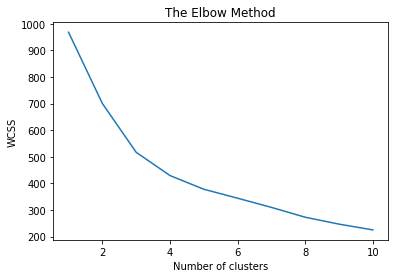

In [38]:
%matplotlib inline

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(ellicott_clustering)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Run *k*-means to cluster the neighborhood into 4 clusters.

In [39]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ellicott_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 1, 0, 0, 2, 3, 0, 0, 2, 3], dtype=int32)

### Prepare the house data to analyze the clustering result

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each house.

In [40]:
ellicott_merged = houses_redfin[['house','latitude','longitude','beds','baths','elmt_school_rating','mid_school_rating','high_school_rating',
                     'price', 'sqFt', 'price_per_sqFt', 'elmt_school_distance', 'mid_school_distance','high_school_distance']]
ellicott_merged.set_index('house', inplace=True)
ellicott_merged.head()

,latitude,longitude,beds,baths,elmt_school_rating,mid_school_rating,high_school_rating,price,sqFt,price_per_sqFt,elmt_school_distance,mid_school_distance,high_school_distance
house,,,,,,,,,,,,,
8369 OLD FREDERICK Rd,39.307275,-76.800331,3.0,2.0,8,7,9,350000,1347.0,260.0,1.0,1.1,2.5
7747 ROCKBURN Dr,39.214262,-76.778442,5.0,3.5,9,8,8,589900,3520.0,168.0,0.5,2.6,2.0
5960 CHARLES Xing,39.215201,-76.797466,3.0,2.5,7,6,6,474990,1930.0,246.0,1.0,1.3,1.0
Cornelius Vanderbilt,39.216150,-76.797373,3.0,2.5,7,6,6,474990,1930.0,246.0,1.0,1.4,1.0
9817 SAWMILL BRANCH Trl,39.308546,-76.818230,4.0,2.5,8,7,9,679990,3155.0,216.0,0.4,0.7,1.7


### Look at the most common venue categories of each house

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [41]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each house.

In [42]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['house']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
houses_venues_sorted = pd.DataFrame(columns=columns)
houses_venues_sorted['house'] = ellicott_grouped['house']

for ind in np.arange(ellicott_grouped.shape[0]):
    houses_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ellicott_grouped.iloc[ind, :], num_top_venues)

houses_venues_sorted.head()

,house,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1102 OELLA Ave,Mexican Restaurant,Bakery,American Restaurant,Wine Shop,Supermarket,State / Provincial Park,Shopping Mall,Neighborhood,Gym / Fitness Center,Grocery Store
1,2460 VALLEY VIEW Way,Theater,Supermarket,State / Provincial Park,Grocery Store,Wine Shop,Shopping Mall,Playground,Neighborhood,Mexican Restaurant,Gym / Fitness Center
2,2541 VINEYARD SPRINGS Way,Theater,State / Provincial Park,Grocery Store,Wine Shop,Supermarket,Shopping Mall,Playground,Neighborhood,Mexican Restaurant,Gym / Fitness Center
3,2549 VINEYARD SPRINGS Way,Theater,State / Provincial Park,Gym,Wine Shop,Supermarket,Shopping Mall,Playground,Neighborhood,Mexican Restaurant,Gym / Fitness Center
4,2550 VINEYARD SPRINGS Way,Theater,State / Provincial Park,Gym,Wine Shop,Supermarket,Shopping Mall,Playground,Neighborhood,Mexican Restaurant,Gym / Fitness Center


### Merge the house basic information and the top 10 venues data

In [43]:

# add clustering labels
ellicott_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
ellicott_merged = ellicott_merged.join(houses_venues_sorted.set_index('house'), on='house')

ellicott_merged.head() # check the last columns!

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,latitude,longitude,beds,baths,elmt_school_rating,mid_school_rating,high_school_rating,price,sqFt,price_per_sqFt,elmt_school_distance,mid_school_distance,high_school_distance,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
house,,,,,,,,,,,,,,,,,,,,,,,,
8369 OLD FREDERICK Rd,39.307275,-76.800331,3.0,2.0,8,7,9,350000,1347.0,260.0,1.0,1.1,2.5,3,State / Provincial Park,Grocery Store,Wine Shop,Theater,Supermarket,Shopping Mall,Playground,Neighborhood,Mexican Restaurant,Gym / Fitness Center
7747 ROCKBURN Dr,39.214262,-76.778442,5.0,3.5,9,8,8,589900,3520.0,168.0,0.5,2.6,2.0,1,Wine Shop,Gym,Coffee Shop,Chinese Restaurant,Shopping Mall,Mexican Restaurant,Gym / Fitness Center,Grocery Store,Asian Restaurant,American Restaurant
5960 CHARLES Xing,39.215201,-76.797466,3.0,2.5,7,6,6,474990,1930.0,246.0,1.0,1.3,1.0,0,American Restaurant,Coffee Shop,Gym,Gym / Fitness Center,Chinese Restaurant,Bakery,Wine Shop,Theater,Shopping Mall,Mexican Restaurant
Cornelius Vanderbilt,39.216150,-76.797373,3.0,2.5,7,6,6,474990,1930.0,246.0,1.0,1.4,1.0,0,American Restaurant,Coffee Shop,Gym,Gym / Fitness Center,Chinese Restaurant,Wine Shop,Theater,Shopping Mall,Mexican Restaurant,Grocery Store
9817 SAWMILL BRANCH Trl,39.308546,-76.818230,4.0,2.5,8,7,9,679990,3155.0,216.0,0.4,0.7,1.7,2,State / Provincial Park,Theater,Grocery Store,Wine Shop,Supermarket,Shopping Mall,Playground,Neighborhood,Mexican Restaurant,Gym / Fitness Center


In [44]:
ellicott_merged['Cluster Labels'].value_counts()

2    38
3    25
0    25
1    13
Name: Cluster Labels, dtype: int64

Finally, let's visualize the resulting clusters

In [78]:
# define the color yellow, blue, red and green

rainbow = ['#ffff00','#0147FA','#ff0000','#008000']

In [45]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
rainbow = ['#ffff00','#0147FA','#ff0000','#008000']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ellicott_merged['latitude'], ellicott_merged['longitude'], ellicott_merged.index, ellicott_merged['Cluster Labels']):
    #print(poi, cluster,rainbow[cluster])
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>

## 5. Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

In [46]:
ellicott_merged.to_csv('Redfin_clustering_results.csv')

#### Cluster 1

In [96]:
ellicott_merged.loc[ellicott_merged['Cluster Labels'] == 0, ellicott_merged.columns[2:]]

,elmt_school_rating,mid_school_rating,high_school_rating,price,sqFt,price_per_sqFt,elmt_school_distance,mid_school_distance,high_school_distance,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
house,,,,,,,,,,,,,,,,,,,,
5960 CHARLES Xing,7,6,6,474990,1930.0,246.0,1.0,1.3,1.0,0,American Restaurant,Coffee Shop,Gym,Gym / Fitness Center,Chinese Restaurant,Bakery,Wine Shop,Theater,Shopping Mall,Mexican Restaurant
Cornelius Vanderbilt,7,6,6,474990,1930.0,246.0,1.0,1.4,1.0,0,American Restaurant,Coffee Shop,Gym,Gym / Fitness Center,Chinese Restaurant,Wine Shop,Theater,Shopping Mall,Mexican Restaurant,Grocery Store
7711 CHATFIELD Ln,7,6,6,350000,1920.0,182.0,0.3,0.2,1.5,0,American Restaurant,Coffee Shop,Grocery Store,Mexican Restaurant,Gym,Chinese Restaurant,Wine Shop,Shopping Mall,Gym / Fitness Center,Theater
7874 MAYFAIR Cir #7,7,6,6,264900,1105.0,240.0,0.2,0.3,1.5,0,American Restaurant,Coffee Shop,Grocery Store,Gym,Mexican Restaurant,Gym / Fitness Center,Chinese Restaurant,Wine Shop,Theater,Supermarket
7747 CHATFIELD Ln,7,6,6,314900,1280.0,246.0,0.3,0.1,1.5,0,Coffee Shop,American Restaurant,Mexican Restaurant,Grocery Store,Chinese Restaurant,Wine Shop,Shopping Mall,Gym / Fitness Center,Gym,Bakery
7757 BLUEBERRY HILL Ln,7,6,6,374900,1700.0,221.0,0.5,0.2,1.7,0,American Restaurant,Mexican Restaurant,Coffee Shop,Grocery Store,Gym / Fitness Center,Gym,Chinese Restaurant,Asian Restaurant,Wine Shop,Theater
5905 LOGANS Way #2,7,6,6,445000,2280.0,195.0,0.9,1.3,0.9,0,American Restaurant,Coffee Shop,Gym,Gym / Fitness Center,Grocery Store,Chinese Restaurant,Bakery,Wine Shop,Theater,Shopping Mall
4653 S LEISURE Ct,7,8,6,475000,2708.0,175.0,1.1,1.0,3.1,0,American Restaurant,Playground,Gym / Fitness Center,Gym,Grocery Store,Coffee Shop,Shopping Mall,Chinese Restaurant,Theater,Bakery
5905 LOGANS Way #1,7,6,6,429900,1750.0,246.0,0.9,1.2,0.9,0,American Restaurant,Coffee Shop,Gym,Gym / Fitness Center,Grocery Store,Chinese Restaurant,Bakery,Wine Shop,Theater,Shopping Mall


#### Cluster 2

In [97]:
ellicott_merged.loc[ellicott_merged['Cluster Labels'] == 1, ellicott_merged.columns[2:]]

,elmt_school_rating,mid_school_rating,high_school_rating,price,sqFt,price_per_sqFt,elmt_school_distance,mid_school_distance,high_school_distance,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
house,,,,,,,,,,,,,,,,,,,,
7747 ROCKBURN Dr,9,8,8,589900,3520.0,168.0,0.5,2.6,2.0,1,Wine Shop,Gym,Coffee Shop,Chinese Restaurant,Shopping Mall,Mexican Restaurant,Gym / Fitness Center,Grocery Store,Asian Restaurant,American Restaurant
3922 OLD COLUMBIA Pike,8,9,9,650000,4263.0,152.0,0.7,1.0,3.4,1,Mexican Restaurant,Coffee Shop,Bakery,American Restaurant,Wine Shop,Supermarket,Shopping Mall,Playground,Neighborhood,Gym / Fitness Center
4509 DONCASTER Dr,9,9,9,674900,3050.0,221.0,0.5,1.3,4.7,1,Coffee Shop,American Restaurant,Wine Shop,Theater,State / Provincial Park,Shopping Mall,Playground,Neighborhood,Mexican Restaurant,Gym / Fitness Center
3322 GOVERNOR CARROLL Ct,8,8,9,589900,3480.0,170.0,1.9,2.4,2.7,1,Mexican Restaurant,Bakery,American Restaurant,Grocery Store,Coffee Shop,Wine Shop,Supermarket,State / Provincial Park,Neighborhood,Theater
8067 HIGH CASTLE Rd,9,9,9,659900,3524.0,187.0,0.7,1.4,4.6,1,Coffee Shop,American Restaurant,Wine Shop,Theater,State / Provincial Park,Shopping Mall,Neighborhood,Mexican Restaurant,Gym / Fitness Center,Chinese Restaurant
3749 CHURCH Rd,8,8,9,855000,3109.0,275.0,1.4,2.2,3.4,1,Mexican Restaurant,Coffee Shop,American Restaurant,Shopping Mall,Grocery Store,Bakery,Wine Shop,Supermarket,Neighborhood,Gym / Fitness Center
4612 TALL MAPLE Ct,9,9,9,610000,2738.0,223.0,0.8,1.6,5.0,1,State / Provincial Park,American Restaurant,Neighborhood,Mexican Restaurant,Gym / Fitness Center,Coffee Shop,Chinese Restaurant,Wine Shop,Theater,Supermarket
3327 GOVERNOR HOWARD Dr,8,8,9,609900,3116.0,196.0,1.9,2.4,2.8,1,Mexican Restaurant,American Restaurant,Grocery Store,Coffee Shop,Bakery,Wine Shop,Supermarket,State / Provincial Park,Neighborhood,Theater
8342 GOVERNOR Run,8,8,9,750000,5572.0,135.0,1.7,2.8,2.8,1,Mexican Restaurant,Bakery,American Restaurant,State / Provincial Park,Gym / Fitness Center,Grocery Store,Wine Shop,Supermarket,Neighborhood,Coffee Shop


#### Cluster 3

In [98]:
ellicott_merged.loc[ellicott_merged['Cluster Labels'] == 2, ellicott_merged.columns[2:]]

,elmt_school_rating,mid_school_rating,high_school_rating,price,sqFt,price_per_sqFt,elmt_school_distance,mid_school_distance,high_school_distance,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
house,,,,,,,,,,,,,,,,,,,,
9817 SAWMILL BRANCH Trl,8,7,9,679990,3155.0,216.0,0.4,0.7,1.7,2,State / Provincial Park,Theater,Grocery Store,Wine Shop,Supermarket,Shopping Mall,Playground,Neighborhood,Mexican Restaurant,Gym / Fitness Center
9819 SOAPSTONE Trl #04,8,7,9,789990,4876.0,162.0,0.2,0.5,1.4,2,Mexican Restaurant,Theater,Supermarket,State / Provincial Park,Shopping Mall,Grocery Store,Bakery,American Restaurant,Wine Shop,Playground
5308 BRIAR OAK Ct,10,7,8,715990,2750.0,260.0,0.7,0.7,1.9,2,Wine Shop,Gym,Coffee Shop,Chinese Restaurant,Shopping Mall,Mexican Restaurant,Grocery Store,Asian Restaurant,American Restaurant,Theater
5313 BRIAR OAK Ct,10,7,8,724990,3550.0,204.0,0.6,0.7,1.9,2,Wine Shop,Gym,Coffee Shop,Chinese Restaurant,Shopping Mall,Mexican Restaurant,Grocery Store,Asian Restaurant,American Restaurant,Theater
5444 KERGER Rd,10,7,8,789880,3300.0,239.0,0.9,1.0,1.4,2,Shopping Mall,Gym,American Restaurant,Wine Shop,Grocery Store,Coffee Shop,Chinese Restaurant,Asian Restaurant,Mexican Restaurant,Gym / Fitness Center
9806 SAWMILL BRANCH Trl,8,7,9,804990,3963.0,203.0,0.2,0.5,1.4,2,Theater,Supermarket,State / Provincial Park,Grocery Store,Wine Shop,Shopping Mall,Playground,Neighborhood,Mexican Restaurant,Gym / Fitness Center
9819 SOAPSTONE Trl #03,8,7,9,774990,4059.0,191.0,0.2,0.5,1.4,2,Mexican Restaurant,Theater,Supermarket,State / Provincial Park,Shopping Mall,Grocery Store,Bakery,American Restaurant,Wine Shop,Playground
5110 SPRING OAKS Ln,10,7,8,695000,4226.0,164.0,0.6,0.7,1.5,2,Shopping Mall,Gym,American Restaurant,Wine Shop,Grocery Store,Coffee Shop,Chinese Restaurant,Asian Restaurant,Theater,Mexican Restaurant
5115 DAWNS Way,10,7,8,685000,4932.0,139.0,0.3,0.3,2.0,2,Wine Shop,Shopping Mall,Gym,Coffee Shop,Chinese Restaurant,State / Provincial Park,Mexican Restaurant,Gym / Fitness Center,Grocery Store,Asian Restaurant


#### Cluster 4

In [99]:
ellicott_merged.loc[ellicott_merged['Cluster Labels'] == 3, ellicott_merged.columns[2:]]

,elmt_school_rating,mid_school_rating,high_school_rating,price,sqFt,price_per_sqFt,elmt_school_distance,mid_school_distance,high_school_distance,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
house,,,,,,,,,,,,,,,,,,,,
8369 OLD FREDERICK Rd,8,7,9,350000,1347.0,260.0,1.0,1.1,2.5,3,State / Provincial Park,Grocery Store,Wine Shop,Theater,Supermarket,Shopping Mall,Playground,Neighborhood,Mexican Restaurant,Gym / Fitness Center
8380 SUNSET Dr,7,9,8,425000,1707.0,249.0,1.5,1.5,0.5,3,Coffee Shop,Playground,Gym / Fitness Center,Gym,American Restaurant,Shopping Mall,Chinese Restaurant,Wine Shop,Grocery Store,Bakery
8781 FREDERICK Rd,8,9,9,174900,1456.0,120.0,1.1,1.4,3.2,3,Mexican Restaurant,Coffee Shop,American Restaurant,Bakery,Wine Shop,Supermarket,Shopping Mall,Playground,Neighborhood,Gym / Fitness Center
4651 YORKSHIRE Dr,7,9,8,629900,3610.0,174.0,2.7,0.4,1.2,3,American Restaurant,Coffee Shop,Shopping Mall,Playground,Gym / Fitness Center,Gym,Grocery Store,Chinese Restaurant,Wine Shop,Neighborhood
8511 COLTRANE Ct #202,8,7,9,397000,1800.0,221.0,1.0,0.8,1.4,3,Mexican Restaurant,Bakery,Coffee Shop,Wine Shop,Supermarket,State / Provincial Park,Grocery Store,American Restaurant,Theater,Shopping Mall
8731 RUPPERT Ct,8,9,9,370000,2072.0,179.0,1.0,1.3,3.0,3,Mexican Restaurant,Coffee Shop,American Restaurant,Bakery,Wine Shop,Supermarket,Shopping Mall,Playground,Neighborhood,Gym / Fitness Center
4903 RAWCLIFFE Ct NE,7,9,8,539900,1911.0,283.0,2.2,0.9,0.8,3,Coffee Shop,American Restaurant,Playground,Shopping Mall,Gym / Fitness Center,Gym,Grocery Store,Chinese Restaurant,Asian Restaurant,Wine Shop
3134 PRISCILLAS Vw,8,8,9,415000,1152.0,360.0,1.8,2.0,3.6,3,Mexican Restaurant,Bakery,American Restaurant,Coffee Shop,Wine Shop,Supermarket,State / Provincial Park,Neighborhood,Grocery Store,Asian Restaurant
8704 BELLEAU Ct,8,9,9,364900,1360.0,268.0,1.3,1.6,3.1,3,Mexican Restaurant,Coffee Shop,American Restaurant,Bakery,Wine Shop,Supermarket,Shopping Mall,Playground,Neighborhood,Gym / Fitness Center


This notebook is part of a course on **Coursera** called *Applied Data Science Capstone*. If you accessed this notebook outside the course, you can take this course online by clicking [here](http://cocl.us/DP0701EN_Coursera_Week3_LAB2).

<hr>
Copyright &copy; 2018 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).